# **Exercies 1:**

In this exercise we verify numerically the purpose of the leverage scores discussed
in class. Generate a random linear model $y = ax_{1} + b + ϵ$ where ϵ is random
Gaussian noise with mean $µ$ and variance $σ^2$
. For various values of $µ$, $σ^2$ generate
data and compute the leverage scores for all the points. Create four types of
points: regular (low noise, close to the model), high variance on x, high variance
on y and finally high variance on both x and y. Plot all results, group in subplots
for the various values of noise variance. Mark on the plots the points with the
highest leverage scores. Repeat the exercise for the 2D case $y = ax_{1}+bx_{2}+c+ϵ$.

In [96]:
%pip install pyod

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import typing as t

In [98]:
def generate_random_linear_model(
  size: int = 1000,
  x1_miu: int = 0,
  x1_std: int = 1,
  noise_miu: int = 0,
  noise_std: int = 1,
  a: int = 1,
  b: int = 1,
) -> t.Dict[str, np.ndarray]:
  x1 = np.random.normal(x1_miu, x1_std, size)
  ϵ = np.random.normal(noise_miu, noise_std, size)

  y = a * x1 + b + ϵ

  return {"y": y, "X": x1}

In [99]:
def get_leverage_scores(samples: np.ndarray) -> np.ndarray:
  """
  Using the SVD decomposition, compute the leverage scores
  for a matrix of samples X as follows:

  H = X @ (X.T @ X).I @ X.T
  H = (U @ S @ V.T) @ [(V @ S @ U.T) @ (U @ S @ V.T)].I @ (V @ S @ U.T)
  H = U @ U.T

  H.diagonal()
  """
  # for the samples, add a column of 1s before of them
  ones = np.ones((samples.shape[0]))
  X = np.column_stack((ones, samples))

  U, _, _ = np.linalg.svd(X, full_matrices=False)
  H = U @ U.T

  return H.diagonal()

def get_dataset_with_leverage_scores(dataset: dict) -> dict:
  """
  Computes the leverage scores and sorts descending
  all the samples according to their values.
  """
  # compute the leverage scores
  dataset["leverage_scores"] = get_leverage_scores(dataset["X"])

  # compute the index sorted decreasingly
  # based on the leverage score of each sample
  dataset_idx = np.argsort(dataset["leverage_scores"])[::-1]

  # update each key using the new indexes
  for key in dataset.keys():
    dataset[key] = dataset[key][dataset_idx]

  return dataset

In [100]:
# generate a dataset with normal parameters
dataset_regular = generate_random_linear_model()
dataset_regular = get_dataset_with_leverage_scores(dataset_regular)

# generate a dataset where the variance of X1 is big
dataset_x1_high_variance = generate_random_linear_model(x1_miu=0, x1_std=10)
dataset_x1_high_variance = get_dataset_with_leverage_scores(dataset_x1_high_variance)

# generate a dataset where the Y variance is big
dataset_y_high_variance = generate_random_linear_model(a=10)
dataset_y_high_variance = get_dataset_with_leverage_scores(dataset_y_high_variance)

# generate a dataset where the noise variance is big
dataset_high_variance = generate_random_linear_model(noise_miu=0, noise_std=10)
dataset_high_variance = get_dataset_with_leverage_scores(dataset_high_variance)

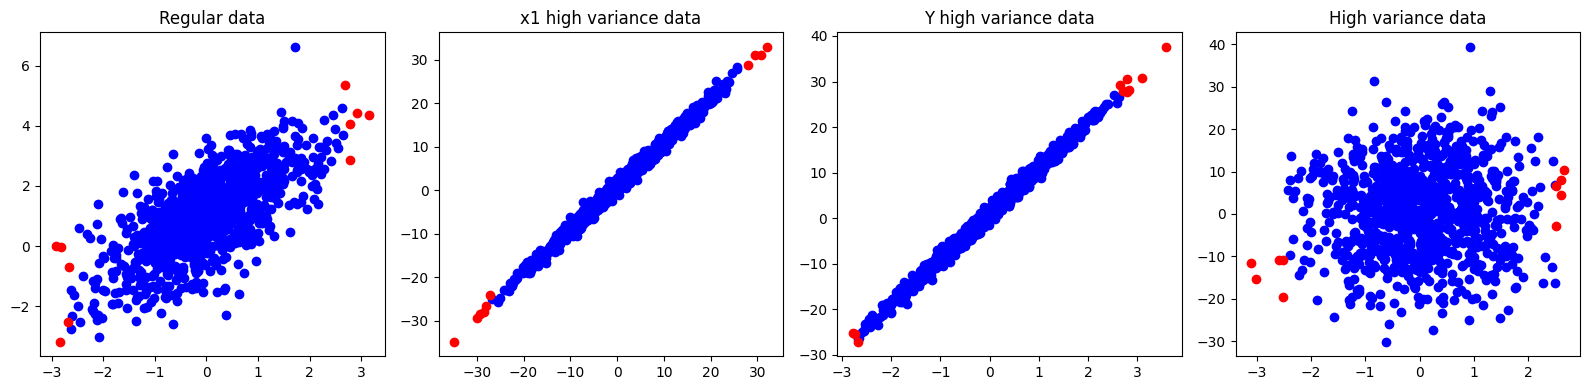

In [101]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].scatter(dataset_regular["X"][10:], dataset_regular["y"][10:], color="blue")
axs[0].scatter(dataset_regular["X"][:10], dataset_regular["y"][:10], color="red")
axs[0].set_title("Regular data")

axs[1].scatter(dataset_x1_high_variance["X"][10:], dataset_x1_high_variance["y"][10:], color="blue")
axs[1].scatter(dataset_x1_high_variance["X"][:10], dataset_x1_high_variance["y"][:10], color="red")
axs[1].set_title("x1 high variance data")

axs[2].scatter(dataset_y_high_variance["X"][10:], dataset_y_high_variance["y"][10:], color="blue")
axs[2].scatter(dataset_y_high_variance["X"][:10], dataset_y_high_variance["y"][:10], color="red")
axs[2].set_title("Y high variance data")

axs[3].scatter(dataset_high_variance["X"][10:], dataset_high_variance["y"][10:], color="blue")
axs[3].scatter(dataset_high_variance["X"][:10], dataset_high_variance["y"][:10], color="red")
axs[3].set_title("High variance data")

plt.tight_layout()
plt.show()

In [102]:
def generate_random_linear_model_2d(
  size: int = 1000,
  x1_miu: int = 0,
  x1_std: int = 1,
  x2_miu: int = 0,
  x2_std: int = 1,
  noise_miu: int = 0,
  noise_std: int = 1,
  a: int = 1,
  b: int = 1,
  c: int = 1,
) -> t.Dict[str, np.ndarray]:
  x1 = np.random.normal(x1_miu, x1_std, size)
  x2 = np.random.normal(x2_miu, x2_std, size)
  X = np.column_stack((x1, x2))
  ϵ = np.random.normal(noise_miu, noise_std, size)

  y = a * x1 + b * x2 + c + ϵ

  return {"y": y, "x1": x1, "x2": x2, "X": X}

In [103]:
# generate a dataset with normal parameters
dataset_regular_2d = generate_random_linear_model_2d()
dataset_regular_2d = get_dataset_with_leverage_scores(dataset_regular_2d)

# generate a dataset where the variance of X1 and X2 is big
dataset_2d_x1_high_variance = generate_random_linear_model_2d(x1_miu=0, x1_std=10, x2_miu=0, x2_std=10)
dataset_2d_x1_high_variance = get_dataset_with_leverage_scores(dataset_2d_x1_high_variance)

# generate a dataset where the Y variance is big
dataset_2d_y_high_variance = generate_random_linear_model_2d(a=10, b=10)
dataset_2d_y_high_variance = get_dataset_with_leverage_scores(dataset_2d_y_high_variance)

# generate a dataset where the noise variance is big
dataset_2d_high_variance = generate_random_linear_model_2d(noise_miu=0, noise_std=10)
dataset_2d_high_variance = get_dataset_with_leverage_scores(dataset_2d_high_variance)

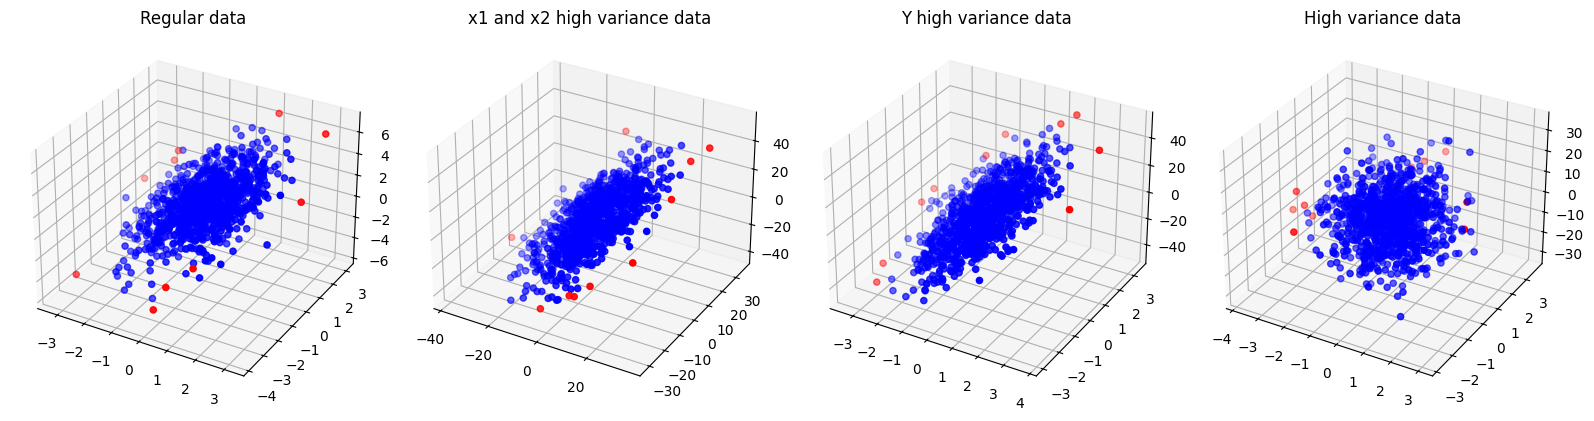

In [104]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4), subplot_kw={'projection': '3d'})

axs[0].scatter(dataset_regular_2d["x1"][10:], dataset_regular_2d["x2"][10:], dataset_regular_2d["y"][10:], color="blue")
axs[0].scatter(dataset_regular_2d["x1"][:10], dataset_regular_2d["x2"][:10], dataset_regular_2d["y"][:10], color="red")
axs[0].set_title("Regular data")

axs[1].scatter(dataset_2d_x1_high_variance["x1"][10:], dataset_2d_x1_high_variance["x2"][10:], dataset_2d_x1_high_variance["y"][10:], color="blue")
axs[1].scatter(dataset_2d_x1_high_variance["x1"][:10], dataset_2d_x1_high_variance["x2"][:10], dataset_2d_x1_high_variance["y"][:10], color="red")
axs[1].set_title("x1 and x2 high variance data")

axs[2].scatter(dataset_2d_y_high_variance["x1"][10:], dataset_2d_y_high_variance["x2"][10:], dataset_2d_y_high_variance["y"][10:], color="blue")
axs[2].scatter(dataset_2d_y_high_variance["x1"][:10], dataset_2d_y_high_variance["x2"][:10], dataset_2d_y_high_variance["y"][:10], color="red")
axs[2].set_title("Y high variance data")

axs[3].scatter(dataset_2d_high_variance["x1"][10:], dataset_2d_high_variance["x2"][10:], dataset_2d_high_variance["y"][10:], color="blue")
axs[3].scatter(dataset_2d_high_variance["x1"][:10], dataset_2d_high_variance["x2"][:10], dataset_2d_high_variance["y"][:10], color="red")
axs[3].set_title("High variance data")

plt.tight_layout()
plt.show()

# **Exercise 2:**
Using the function generate data clusters generate a 2-dimensional dataset
with 400 train samples and 200 test samples that are organized in 2 clusters,
with 0.1 contamination. Train a **KNN** model from **pyod.models.knn**. Use 4
subplots in order to display using different colors (for inliers and outliers):

- Ground truth labels for training data
- Predicted labels for training data
- Ground truth labels for test data
- Predicted labels for test data

Use different values for the **n_neighbors** parameter and observe how this
affects the detection of small clusters of anomalies. Also compute the balanced
accuracy for each parameter.

In [105]:
%pip install combo

In [106]:
from pyod.utils.data import generate_data_clusters
from pyod.utils.utility import standardizer
from pyod.models import knn
from pyod.models.combination import average, maximization

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [107]:
from sklearn.metrics import confusion_matrix

class Metrics:
    @staticmethod
    def balanced_accuracy(labels: np.ndarray, predictions: np.ndarray) -> float:
        tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()

        # compute recall, sensitivity
        tpr = tp / (tp + fn)
        # compute specificity
        tnr = tn / (tn + fp)
        # compute balanced accuracy
        ba = (tpr + tnr) / 2

        return ba

In [108]:
def knn_fit_and_plot(
    k: int,
    contamination: float,
    train_samples: np.ndarray,
    test_samples: np.ndarray,
    train_labels: np.ndarray,
    test_labels: np.ndarray,
  ) -> None:
  # define a kNN model, fit the training data
  knn_ = knn.KNN(contamination=contamination, n_neighbors=k)
  knn_.fit(train_samples)

  # retrieve the train and test predictions
  knn_train_predictions = knn_.labels_
  knn_test_predictions = knn_.predict(test_samples)

  # compute the balanced accuracy for train and test
  knn_train_ba = Metrics.balanced_accuracy(train_labels, knn_train_predictions)
  knn_test_ba = Metrics.balanced_accuracy(test_labels, knn_test_predictions)

  # plot the performance of the kNN model
  fig, axs = plt.subplots(1, 4, figsize=(20, 4))
  fig.suptitle(f'{k}NN for clustering', fontsize=16, y=1.02)

  axs[0].scatter(train_samples[train_labels == 0][:, 0], train_samples[train_labels == 0][:, 1], color="blue", label="normal")
  axs[0].scatter(train_samples[train_labels == 1][:, 0], train_samples[train_labels == 1][:, 1], color="red", label="anomaly")
  axs[0].set_title("Ground truth for train")
  axs[0].legend()

  axs[1].scatter(train_samples[knn_train_predictions == 0][:, 0], train_samples[knn_train_predictions == 0][:, 1], color="blue", label="normal")
  axs[1].scatter(train_samples[knn_train_predictions == 1][:, 0], train_samples[knn_train_predictions == 1][:, 1], color="red", label="anomaly")
  axs[1].set_title("Predictions for train")
  axs[1].legend(title=f"BA: {knn_train_ba:.2f}", loc="upper left")

  axs[2].scatter(test_samples[test_labels == 0][:, 0], test_samples[test_labels == 0][:, 1], color="blue", label="normal")
  axs[2].scatter(test_samples[test_labels == 1][:, 0], test_samples[test_labels == 1][:, 1], color="red", label="anomaly")
  axs[2].set_title("Ground truth for test")
  axs[2].legend()

  axs[3].scatter(test_samples[knn_test_predictions == 0][:, 0], test_samples[knn_test_predictions == 0][:, 1], color="blue", label="normal")
  axs[3].scatter(test_samples[knn_test_predictions == 1][:, 0], test_samples[knn_test_predictions == 1][:, 1], color="red", label="anomaly")
  axs[3].set_title("Predictions for test")
  axs[3].legend(title=f"BA: {knn_test_ba:.2f}", loc="upper left")

  plt.show()

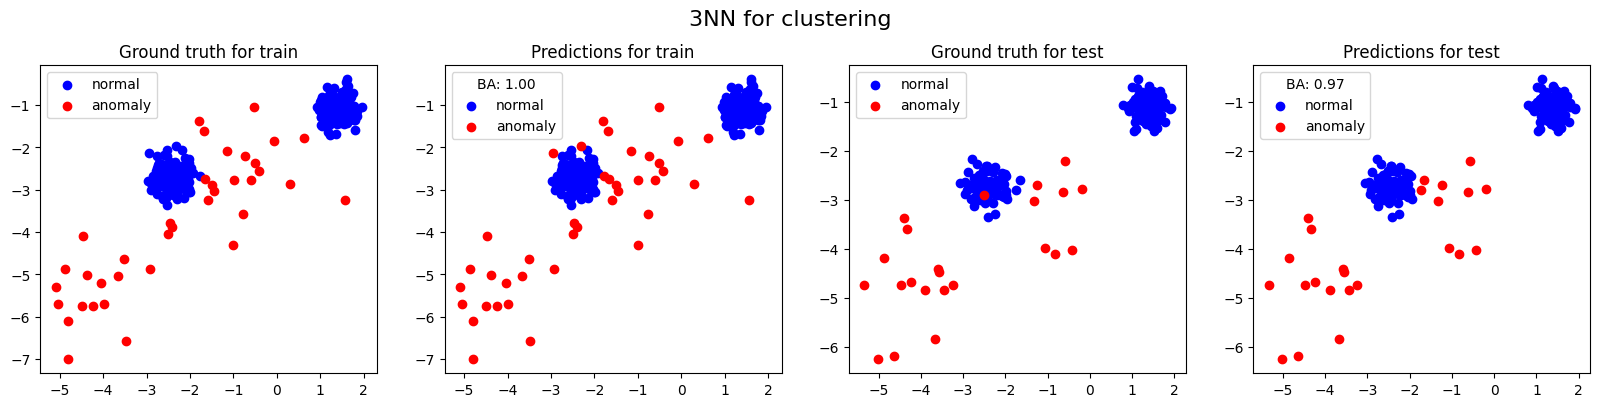

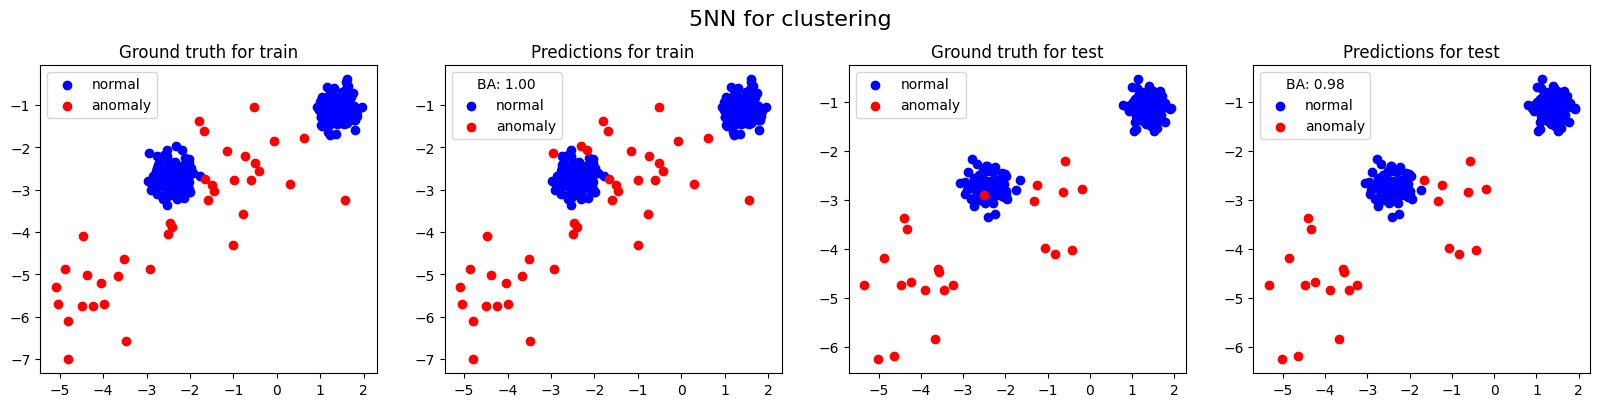

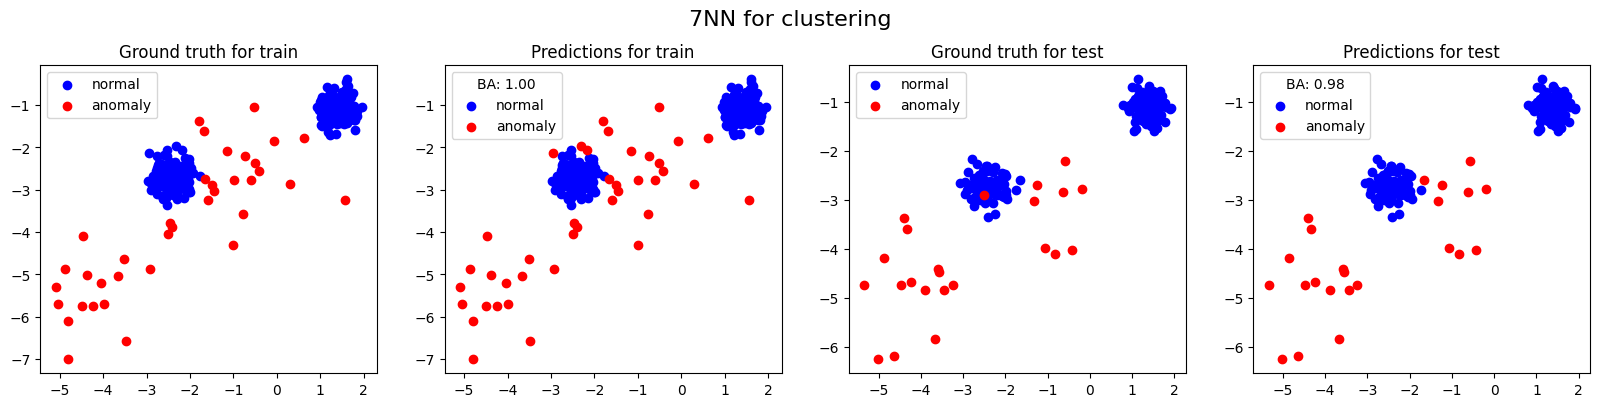

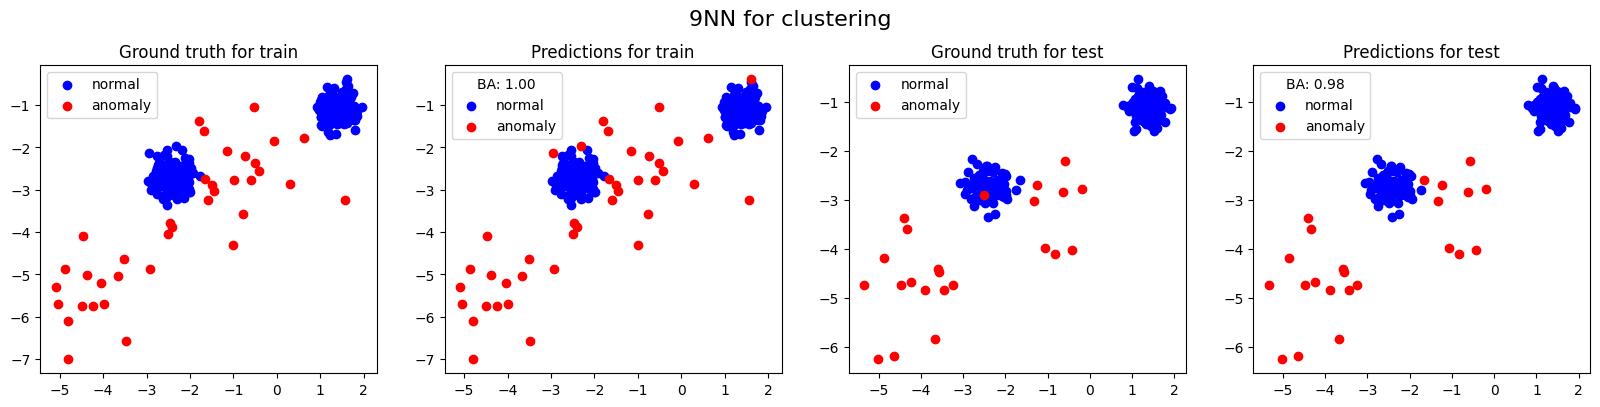

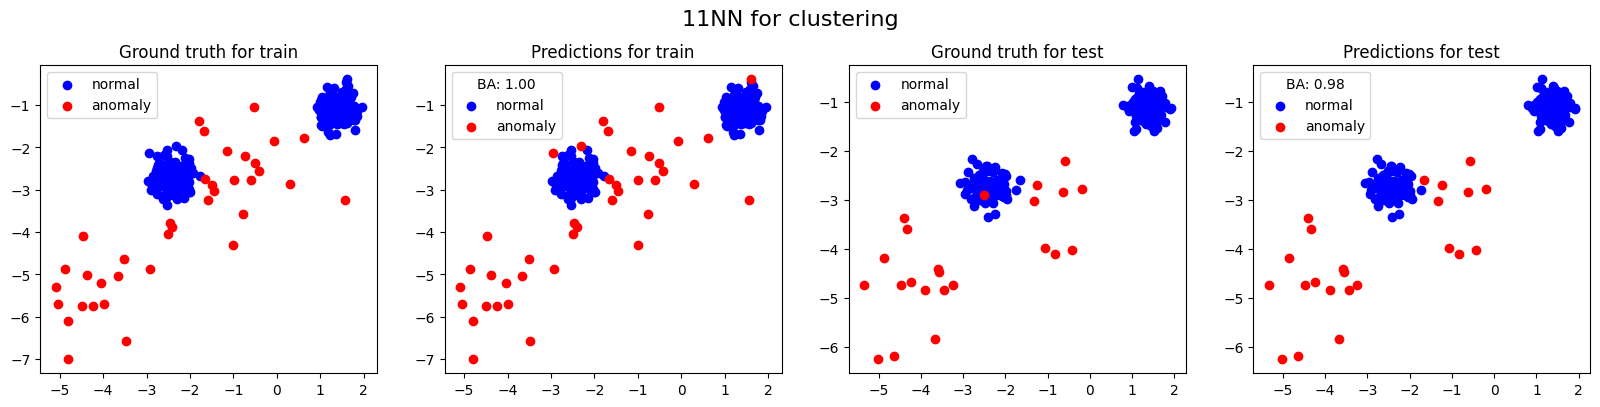

In [115]:
contamination = 0.1
knn_train_samples, knn_test_samples, knn_train_labels, knn_test_labels = generate_data_clusters(n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=contamination)
k_neighbours = [3, 5, 7, 9, 11]

for k in k_neighbours:
  knn_fit_and_plot(k, contamination, knn_train_samples, knn_test_samples, knn_train_labels, knn_test_labels)

# **Exercise 3:**
In this exercise we will see the limitations of distance based algorithms like
**KNN**. Specifically, we will observe how **KNN** behaves when our data clusters
have different densities and how **pyod.models.lof.LOF** solves the problem by
considering the variations of the local densities of the datapoints. First, generate
2 clusters (**200** and **100** samples respectively) with 2-dimensional samples using
**(-10, -10)** and **(10, 10)** as centers, 2 and 6 as standard deviations using
**sklearn.datasets.make_blobs()** function. Then, fit **KNN** and **LOF** with the
generated data using a small contamination rate (0.07) and find the predicted
labels. Use 2 subplots to plot (using different colors for inliers and outliers) the
2 clusters and observe how the 2 models behave for different **n_neighbors**.


In [116]:
from pyod.models.lof import LOF

In [117]:
cluster_1 = make_blobs(n_samples=200, n_features=2, centers=[[-10, -10]], cluster_std=2)[0]
cluster_2 = make_blobs(n_samples=100, n_features=2, centers=[[10, 10]], cluster_std=6)[0]
clusters = np.vstack((cluster_1, cluster_2))

contamination = 0.07

In [118]:
def plot_lof_vs_knn(
  clusters: np.ndarray,
  k: int,
  __knn_labels: np.ndarray,
  __lof_labels: np.ndarray,
):
  fig, axs = plt.subplots(1, 2, figsize=(20, 10))
  fig.suptitle(f'kNN vs LOF, k = {k}, with multiple clusters densities', fontsize=16, y=1.01)

  axs[0].scatter(clusters[__knn_labels == 0][:, 0], clusters[__knn_labels == 0][:, 1], color="blue", label="normal")
  axs[0].scatter(clusters[__knn_labels == 1][:, 0], clusters[__knn_labels == 1][:, 1], color="red", label="anomaly")
  axs[0].set_title(f"{k}NN")

  axs[1].scatter(clusters[__lof_labels == 0][:, 0], clusters[__lof_labels == 0][:, 1], color="blue", label="normal")
  axs[1].scatter(clusters[__lof_labels == 1][:, 0], clusters[__lof_labels == 1][:, 1], color="red", label="anomaly")
  axs[1].set_title("LOF")

  plt.show()

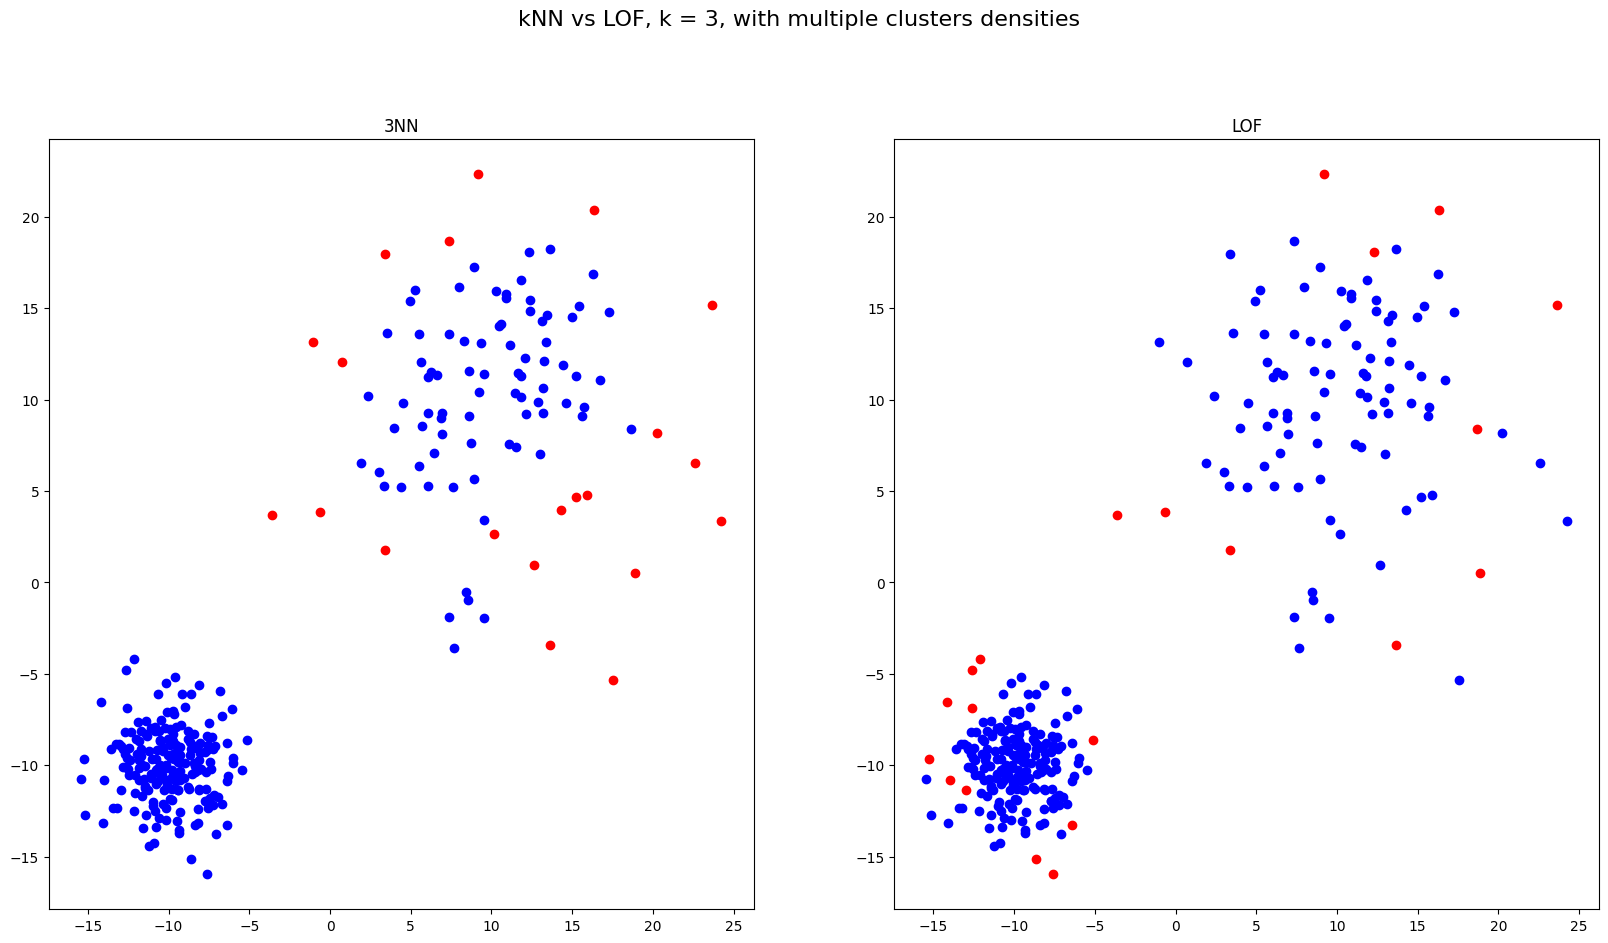

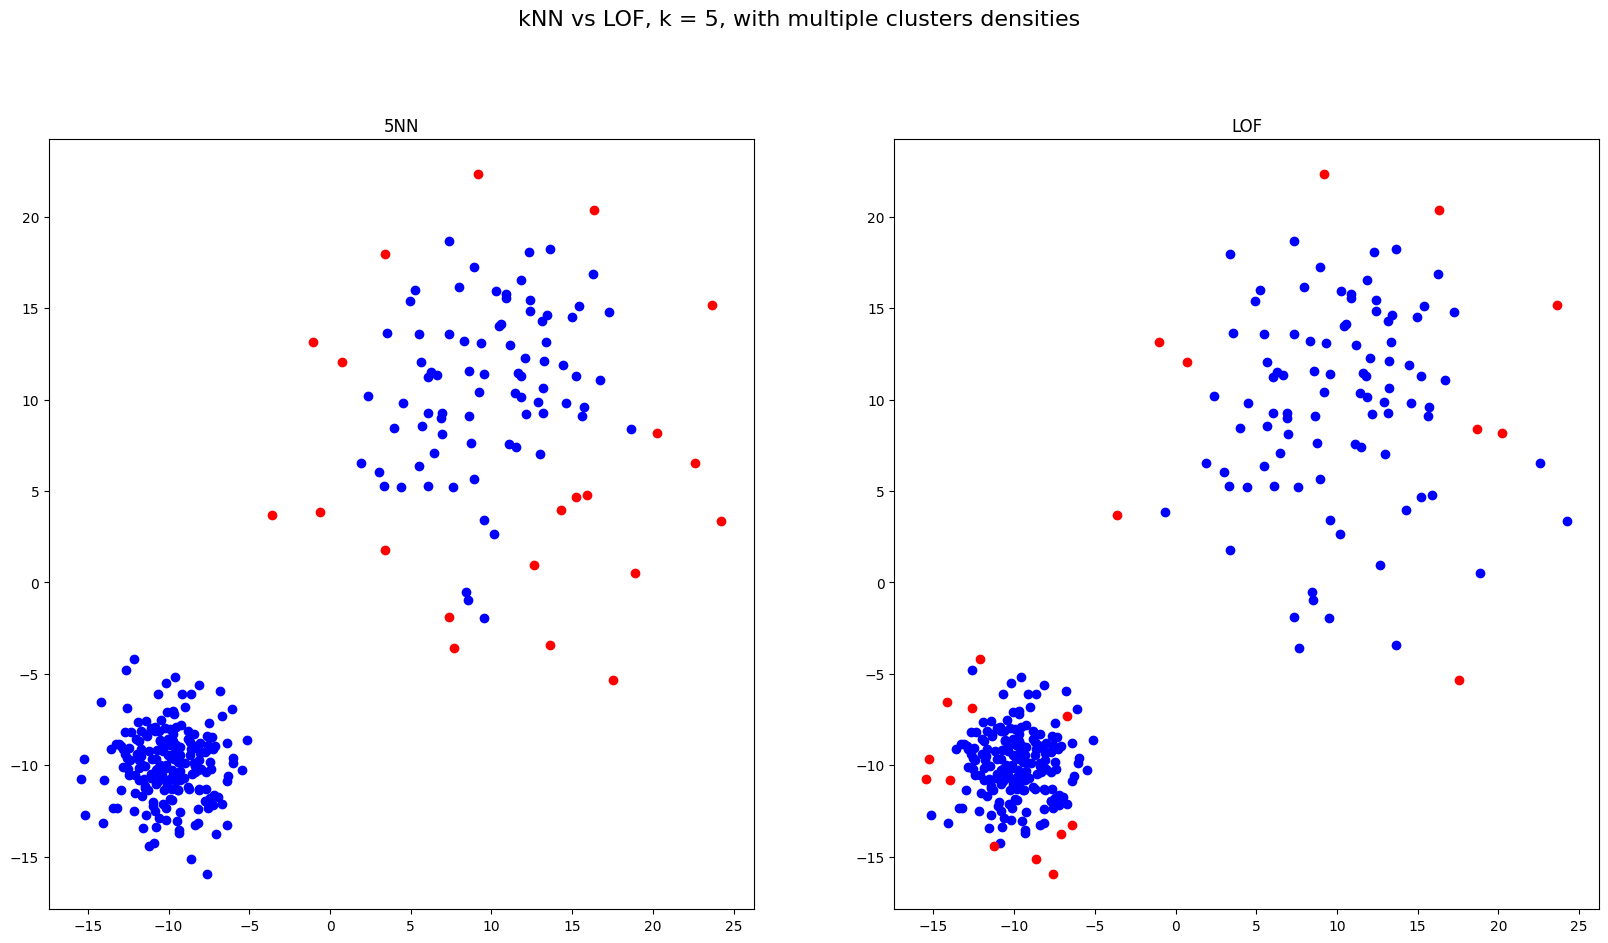

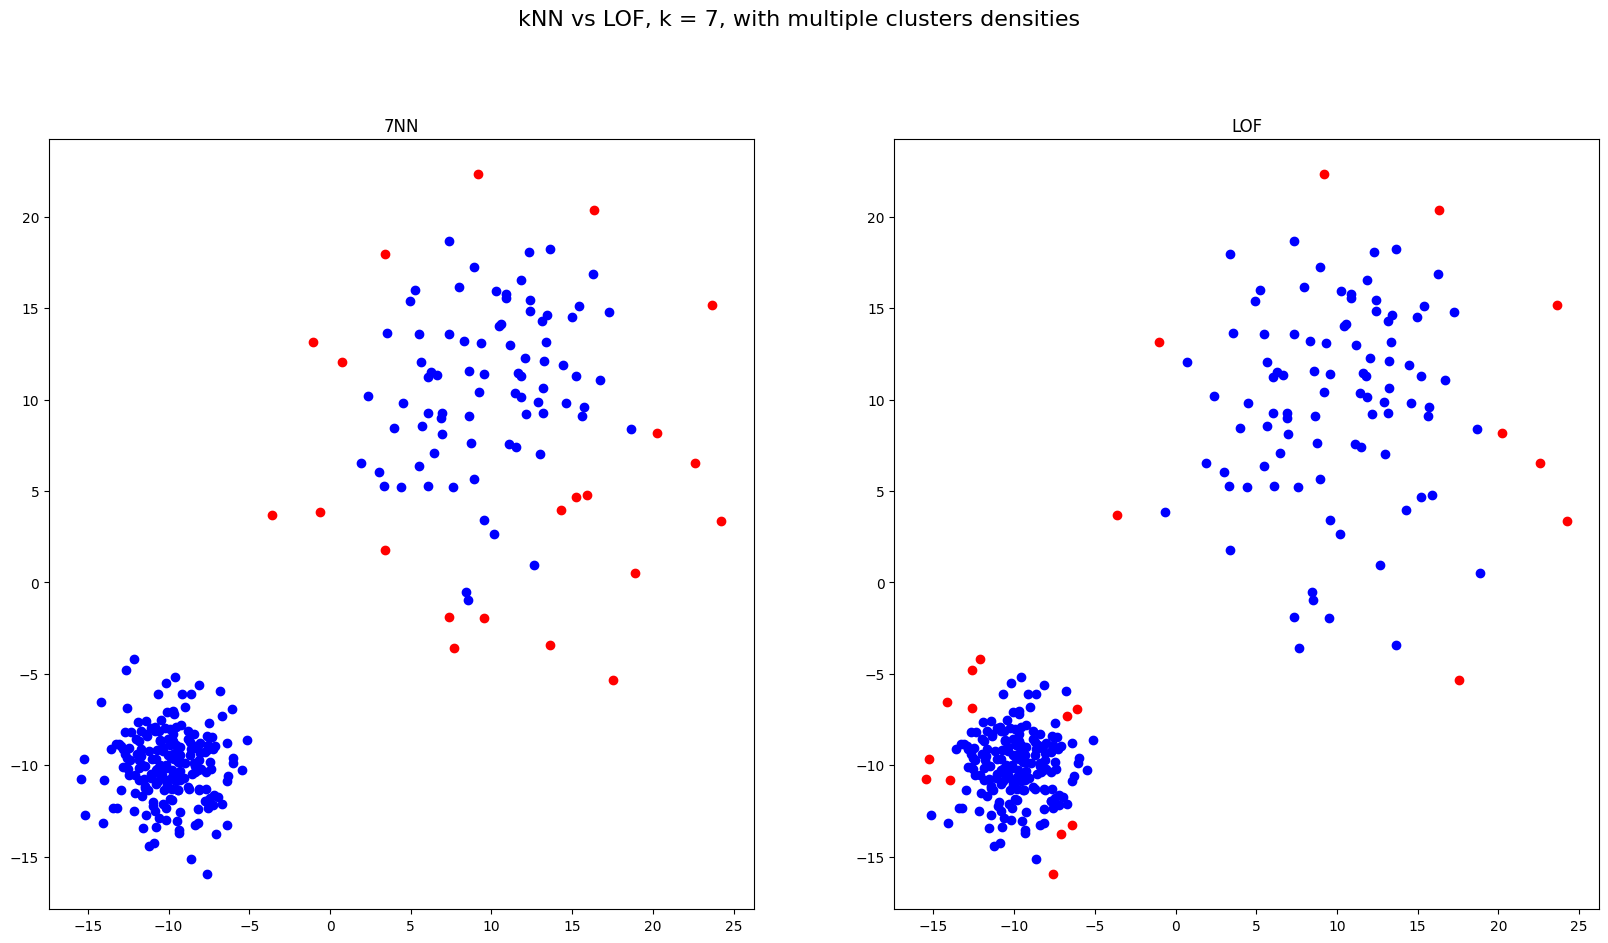

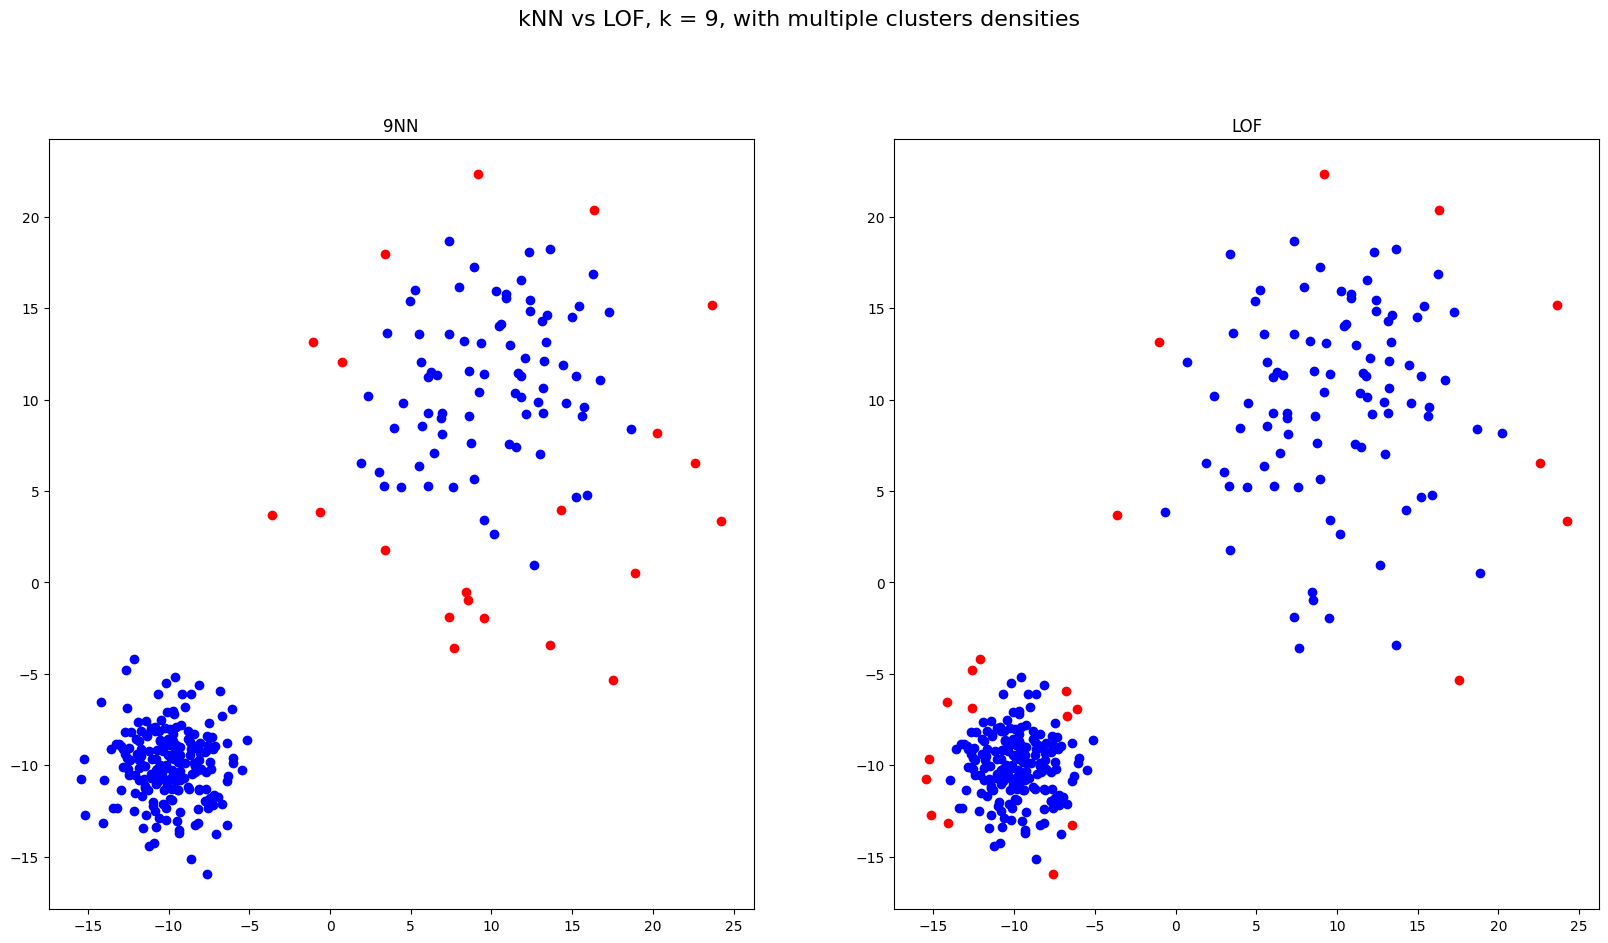

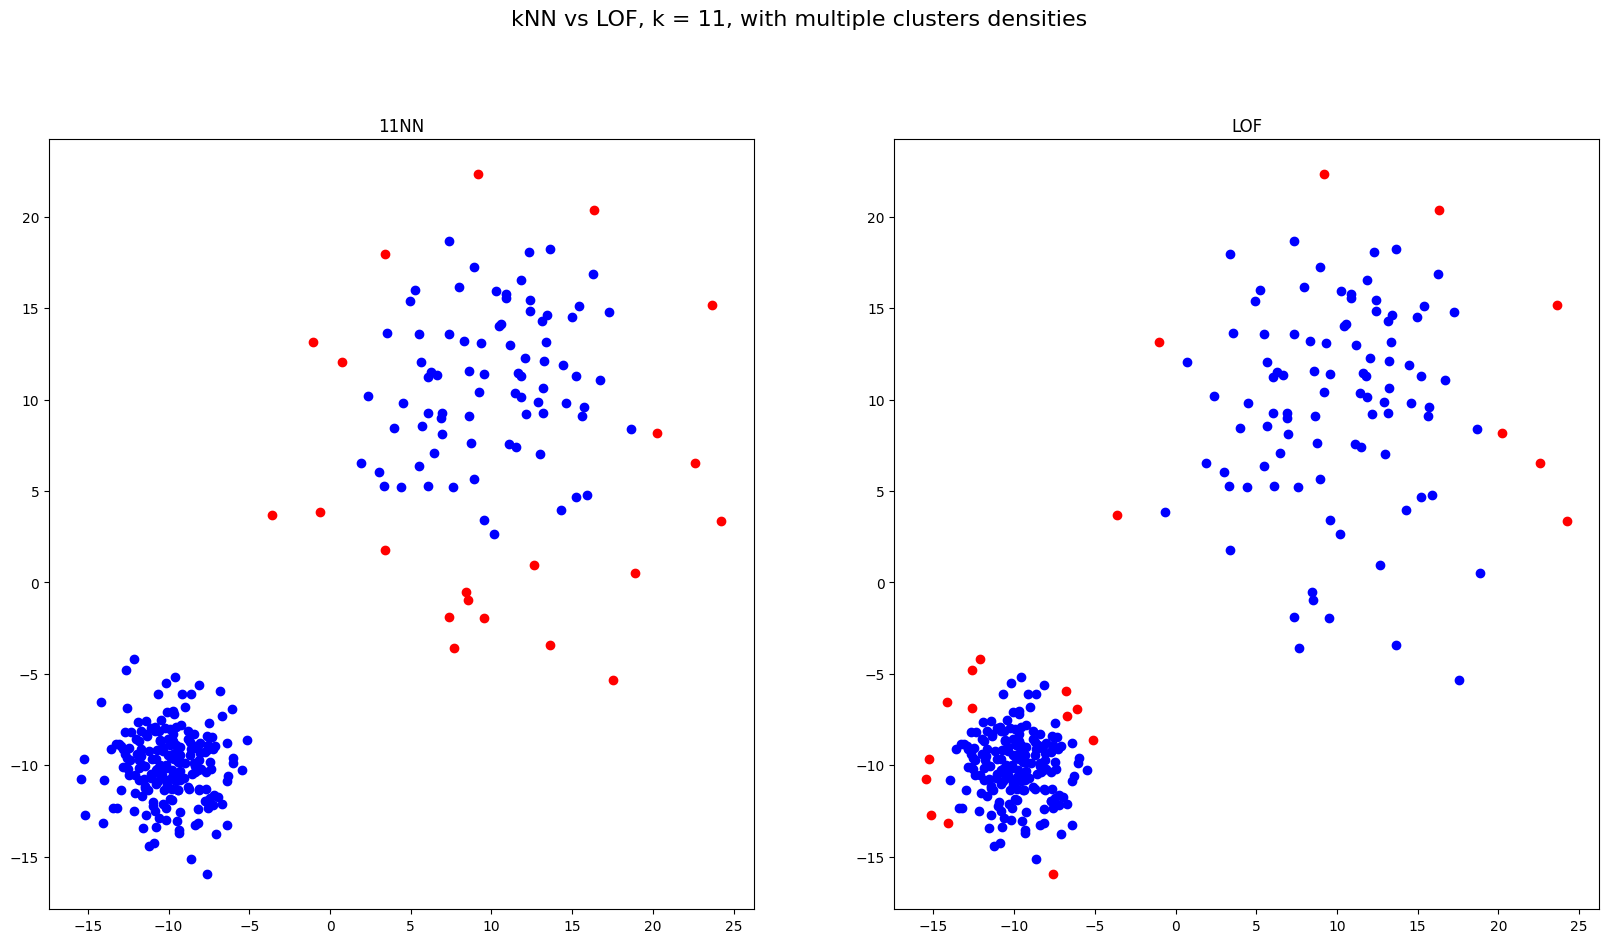

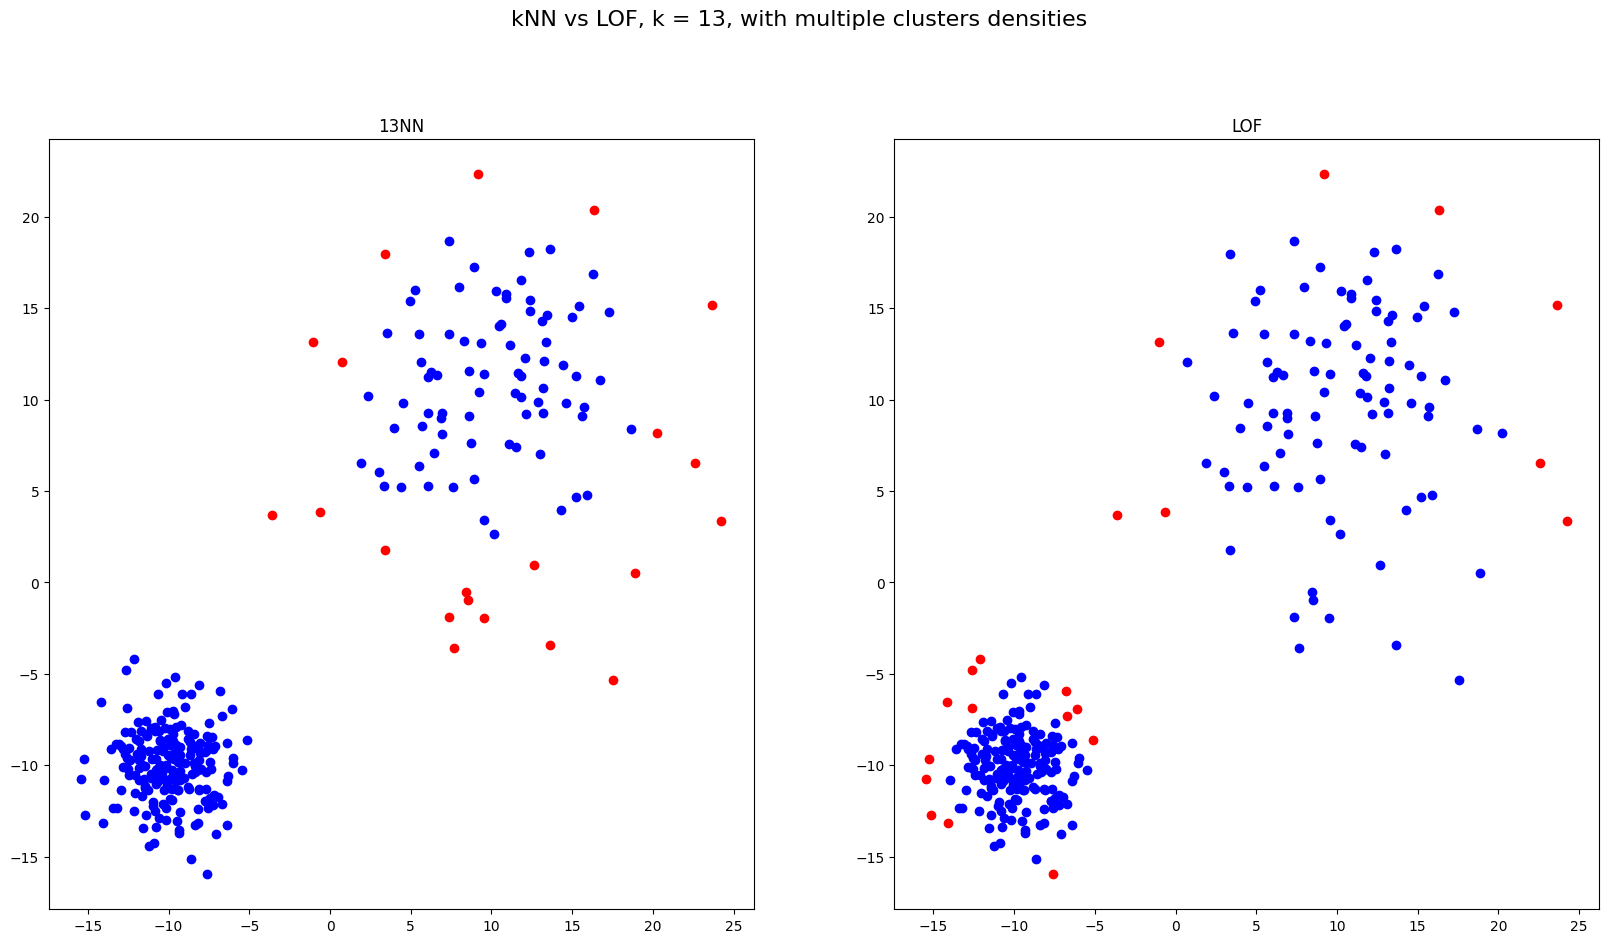

In [119]:
k_neighbours = [3, 5, 7, 9, 11, 13]

for k in k_neighbours:
  # define and fit kNN
  __knn = knn.KNN(contamination=contamination, n_neighbors=k)
  __knn.fit(clusters)
  __knn_labels = __knn.labels_

  # define and fit LOF
  __lof = LOF(contamination=contamination, n_neighbors=k)
  __lof.fit(clusters)
  __lof_labels = __lof.labels_

  plot_lof_vs_knn(clusters, k, __knn_labels, __lof_labels)

# **Exercise 4:**

For this exercise we will need the cardio dataset from ODDS (*https://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/*).

Load the data using **scipy.io.loadmat()**
and use **train_test_split()** to split it into train and test subsets. Normalize
your data accordingly. You will use an ensemble of classifiers of the same
type (**KNN** or **LOF**) in order to create an average/maximization strategy
(average/maximum score will be returned). Create 10 **KNN/LOF** models
for which you vary parameter **n_neighbors** from 30 to 120 (here you can use
other intervals/steps if you observe that they produce better results). Fit each
model, print the balanced accuracy (BA) for train/test data and store both the
train and test scores in order to use them later. Normalize both scores using
**pyod.utils.utility.standardizer()** and use **pyod.models.combination.average()**
and **pyod.models.combination.maximization()** to find the final scores for
the 2 strategies. For each of them find the threshold used for classification
(using **numpy.quantile()** with the known contamination rate of the dataset),
compute the predictions and print the balanced accuracy (BA).

In [120]:
!wget -O cardio.mat https://www.dropbox.com/scl/fi/a1v7m3p1kbcnte1/cardio.mat?rlkey=84oboq7oqussys4iqi2b3kgv2&e=1&dl=1

--2024-10-31 19:28:52--  https://www.dropbox.com/scl/fi/a1v7m3p1kbcnte1/cardio.mat?rlkey=84oboq7oqussys4iqi2b3kgv2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31a88965ed72bfcaee717028f2.dl.dropboxusercontent.com/cd/0/inline/CdiH4WhI1WqnxhEFWrwtv73VsJovzLcMyz0ay8gGDxYEclSFtcguerAWqWPZOikwCvnHf4XSQivxHD5WwfUKVjBm1ksKse2kcUzv45r7bWNMeNCN2aRIpI_ICOlLGm00Pvg/file# [following]
--2024-10-31 19:28:53--  https://uc31a88965ed72bfcaee717028f2.dl.dropboxusercontent.com/cd/0/inline/CdiH4WhI1WqnxhEFWrwtv73VsJovzLcMyz0ay8gGDxYEclSFtcguerAWqWPZOikwCvnHf4XSQivxHD5WwfUKVjBm1ksKse2kcUzv45r7bWNMeNCN2aRIpI_ICOlLGm00Pvg/file
Resolving uc31a88965ed72bfcaee717028f2.dl.dropboxusercontent.com (uc31a88965ed72bfcaee717028f2.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:6018:15::a27d:30f
Connecting to uc31a88965ed72b

In [121]:
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

In [122]:
# load the dataset
cardio_dataset = loadmat("cardio.mat")
cardio_samples, cardio_labels = cardio_dataset["X"], cardio_dataset["y"]
cardio_contamination = round(np.sum(cardio_labels == 1) / np.sum(cardio_labels == 0), 2)

# split the dataset into train and test
cardio_train_samples, cardio_test_samples, cardio_train_labels, cardio_test_labels = train_test_split(cardio_samples, cardio_labels, test_size=0.2)

In [123]:
# standardize both train and test samples
cardio_train_samples -= np.mean(cardio_train_samples, axis=0)
cardio_train_samples /= np.std(cardio_train_samples, axis=0)

cardio_test_samples -= np.mean(cardio_test_samples, axis=0)
cardio_test_samples /= np.std(cardio_test_samples, axis=0)

In [124]:
cardio_train_scores = []
cardio_test_scores = []

k_min, k_max, k_step = 30, 120, 10
k_neighbours = [k for k in range(k_min, k_max + 1, k_step)]

for k in k_neighbours:
  # define and fit LOF
  __lof = LOF(contamination=cardio_contamination, n_neighbors=k)
  __lof.fit(cardio_train_samples)

  # compute train labels and scores
  __lof_train_labels = __lof.labels_
  cardio_train_scores.append(__lof.decision_scores_)

  # compute test labels and scores
  __lof_test_labels, __lof_test_scores = __lof.predict(cardio_test_samples, return_confidence=True)
  cardio_test_scores.append(__lof_test_scores)

  # compute and print balanced accuracy for train and test
  train_ba = Metrics.balanced_accuracy(cardio_train_labels, __lof_train_labels)
  test_ba = Metrics.balanced_accuracy(cardio_test_labels, __lof_test_labels)

  print(f"K = {k}")
  print(f"Balanced accuracy for cardio train: {train_ba:.2f}")
  print(f"Balanced accuracy for cardio test: {test_ba:.2f}")
  print()

K = 30
Balanced accuracy for cardio train: 0.55
Balanced accuracy for cardio test: 0.53

K = 40
Balanced accuracy for cardio train: 0.55
Balanced accuracy for cardio test: 0.53

K = 50
Balanced accuracy for cardio train: 0.55
Balanced accuracy for cardio test: 0.55

K = 60
Balanced accuracy for cardio train: 0.55
Balanced accuracy for cardio test: 0.56

K = 70
Balanced accuracy for cardio train: 0.56
Balanced accuracy for cardio test: 0.57

K = 80
Balanced accuracy for cardio train: 0.59
Balanced accuracy for cardio test: 0.57

K = 90
Balanced accuracy for cardio train: 0.61
Balanced accuracy for cardio test: 0.62

K = 100
Balanced accuracy for cardio train: 0.63
Balanced accuracy for cardio test: 0.64

K = 110
Balanced accuracy for cardio train: 0.66
Balanced accuracy for cardio test: 0.64

K = 120
Balanced accuracy for cardio train: 0.69
Balanced accuracy for cardio test: 0.66



In [125]:
# transform list of np arrays into np ndarray by using
# their transpose: (models, samples) to (samples, models)
cardio_train_scores = np.array(cardio_train_scores).T
cardio_test_scores = np.array(cardio_test_scores).T

cardio_train_scores = standardizer(cardio_train_scores)
cardio_test_scores = standardizer(cardio_test_scores)

In [126]:
# compute the average scores
cardio_train_average_scores = average(cardio_train_scores)
cardio_test_average_scores = average(cardio_test_scores)

# compute the quantile thresholds
cardio_train_average_quantile = np.quantile(cardio_train_average_scores, 1 - cardio_contamination)
cardio_test_average_quantile = np.quantile(cardio_test_average_scores, 1 - cardio_contamination)

# compute the labels by comparing the values to the quantile threshold
cardio_train_average_labels = [int(label) for label in cardio_train_average_scores > cardio_train_average_quantile]
cardio_test_average_labels = [int(label) for label in cardio_test_average_scores > cardio_test_average_quantile]

# compute balanced accuracy
cardio_train_average_ba = Metrics.balanced_accuracy(cardio_train_labels, cardio_train_average_labels)
cardio_test_average_ba = Metrics.balanced_accuracy(cardio_test_labels, cardio_test_average_labels)

print(f"Balanced accuracy for average scores train: {cardio_train_average_ba:.2f}")
print(f"Balanced accuracy for average scores test: {cardio_test_average_ba:.2f}")

Balanced accuracy for average scores train: 0.58
Balanced accuracy for average scores test: 0.50


In [127]:
# compute the maximization scores
cardio_train_maximization_scores = maximization(cardio_train_scores)
cardio_test_maximization_scores = maximization(cardio_test_scores)

# compute the quantile thresholds
cardio_train_maximization_quantile = np.quantile(cardio_train_maximization_scores, 1 - cardio_contamination)
cardio_test_maximization_quantile = np.quantile(cardio_test_maximization_scores, 1 - cardio_contamination)

# compute the labels by comparing the values to the quantile threshold
cardio_train_maximization_labels = [int(label) for label in cardio_train_maximization_scores > cardio_train_maximization_quantile]
cardio_test_maximization_labels = [int(label) for label in cardio_test_maximization_scores > cardio_test_maximization_quantile]

# compute balanced accuracy
cardio_train_maximization_ba = Metrics.balanced_accuracy(cardio_train_labels, cardio_train_maximization_labels)
cardio_test_maximization_ba = Metrics.balanced_accuracy(cardio_test_labels, cardio_test_maximization_labels)

print(f"Balanced accuracy for maximization scores train: {cardio_train_maximization_ba:.2f}")
print(f"Balanced accuracy for maximization scores test: {cardio_test_maximization_ba:.2f}")

Balanced accuracy for maximization scores train: 0.62
Balanced accuracy for maximization scores test: 0.50
